In [2]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [26]:
from glob import glob


In [85]:
class LabeledDataset(Dataset):

    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_names = [os.path.basename(i) for i in glob(root_dir + '/*')]
        self.labels = [i.split('.')[0].split('_')[1] for i in self.file_names]
    

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = io.imread(self.root_dir + self.file_names[idx])
        
        if self.transform:
            image = self.transform(image)
            
        item = {'image': image, 'label': self.labels[idx]}

        return item
    
class UnlabeledDataset(Dataset):

    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_names = [os.path.basename(i) for i in glob(root_dir + '/*')]
    

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = io.imread(self.root_dir + self.file_names[idx])
        
        if self.transform:
            image = self.transform(image)
            
        item = {'image': image}

        return item    

0
0
1
0
1


<Figure size 432x288 with 0 Axes>

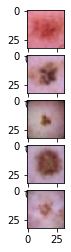

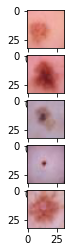

<Figure size 432x288 with 0 Axes>

In [77]:
labeled = LabeledDataset(root_dir='data/MelanomaDetection/labeled/')

for i in range(5):
    ax = plt.subplot(5, 1, i + 1)
    plt.imshow(labeled[i]['image'])
    print(labeled[i]['label'])
plt.figure()
    

unlabeled = UnlabeledDataset(root_dir='data/MelanomaDetection/unlabeled/')
print(unlabeled)
for i in range(5):
    ax = plt.subplot(5, 1, i + 1)
    plt.imshow(unlabeled[i]['image'])
plt.figure()
    
    
    

TypeError: img should be PIL Image. Got <class 'numpy.ndarray'>

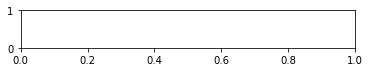

In [86]:

transform = transforms.Compose([
    transforms.Pad((32,32)),
    transforms.Resize((32,32)),
    transforms.CenterCrop((32,32))
])

labeled = LabeledDataset(root_dir = 'data/MelanomaDetection/labeled/', transform = transform)

for i in range(5):
    ax = plt.subplot(5, 1, i + 1)
    plt.imshow(labeled[i]['image'])
    print(labeled[i]['label'])
plt.figure()